In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\aishk\Desktop\Meander_HandPD.csv')
df.shape

(368, 16)

In [3]:
df.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,0068-1.jpg,1,1,F,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,F,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,M,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [4]:

# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [5]:
data = df[numerical_features]

In [6]:
data.head()

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,68,1,1,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,1,1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,1,1,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,1,1,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,2,1,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [7]:
features=df.loc[:,df.columns!='CLASS_TYPE']
labels=df.loc[:,'CLASS_TYPE']

In [8]:
features = features.drop(['_ID_EXAM', 'ID_PATIENT','IMAGE_NAME','GENDER','RIGH/LEFT-HANDED'], axis=1)

In [9]:
features.head()

,AGE,RMS,MAX_BETWEEN_ST_HT,MIN_BETWEEN_ST_HT,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [10]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: CLASS_TYPE, dtype: int64

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((257, 10), (257,), (111, 10), (111,))

In [12]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([0.32804945, 0.05125546, 0.02279333, 0.00542427, 0.01241233,
       0.02801563, 0.0325141 , 0.        , 0.05710369, 0.03931314])

<AxesSubplot:>

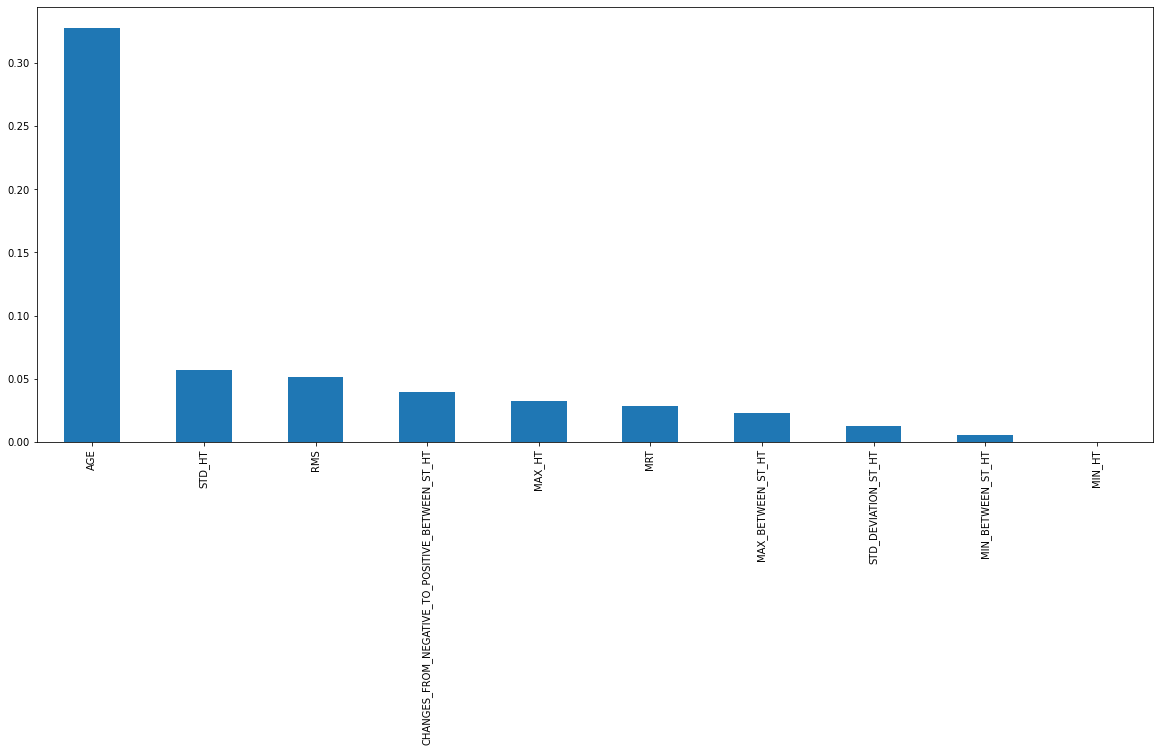

In [14]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [15]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=5).fit(X_train.fillna(0), y_train)
print('Selected top 5 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 5 features: Index(['AGE', 'RMS', 'MAX_HT', 'STD_HT',
       'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')


In [16]:
top5features = features.drop(['MIN_HT','MRT', 'STD_DEVIATION_ST_HT','MIN_BETWEEN_ST_HT','MAX_BETWEEN_ST_HT'], axis=1)
top5features.head()

,AGE,RMS,MAX_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT
0,28,3176.216064,224.197754,802.821106,0.216138
1,28,2751.015869,212.937836,939.975647,0.184438
2,28,3050.623779,223.401764,997.580139,0.181287
3,28,2594.598877,233.222504,2060.858887,0.193084
4,37,3310.786865,196.811325,562.886475,0.193642


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

<AxesSubplot:>

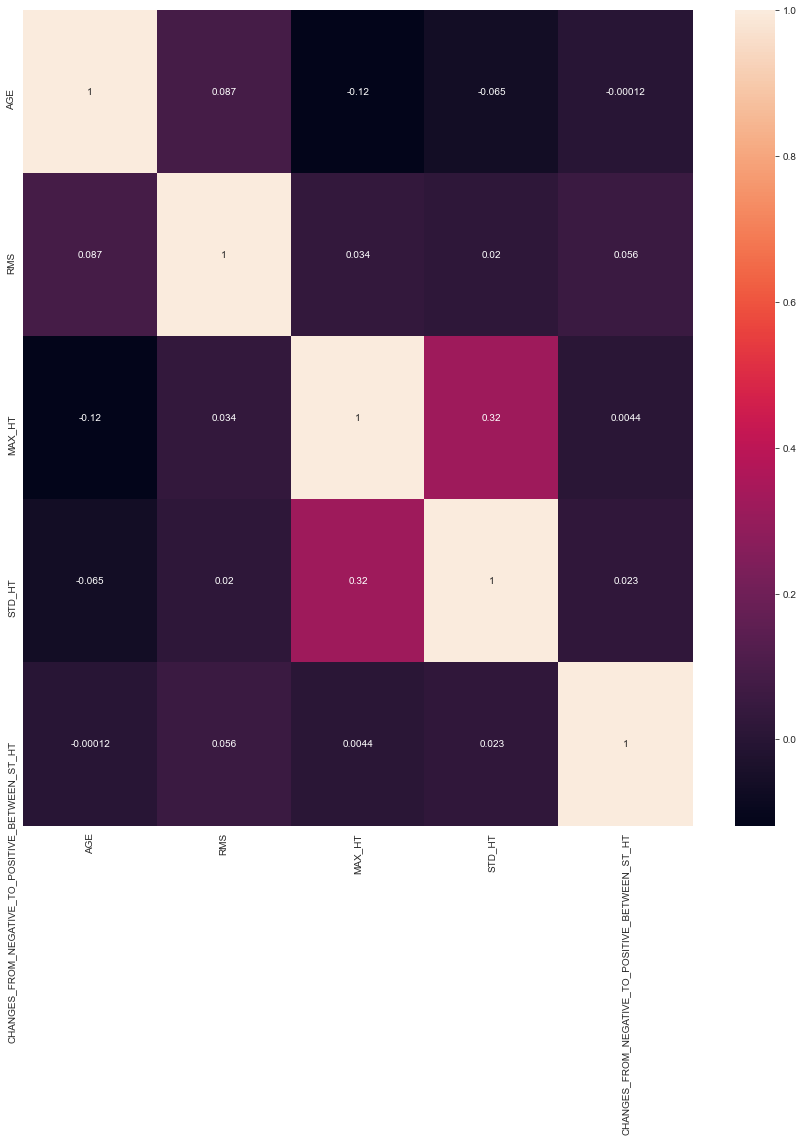

In [18]:
import seaborn as sns
corr_map=top5features.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [21]:
mm_scaler = MinMaxScaler(feature_range=(-1,1))

In [22]:
X = mm_scaler.fit_transform(top5features) 
y = labels.values

In [23]:
#Checking the class (percentage) distribution 
pd.crosstab(y, columns='count')

col_0,count
row_0,
1,72
2,296


In [24]:
import imblearn
from imblearn import over_sampling

In [25]:
#Applying SMOTE on the training data
smote = imblearn.over_sampling.SMOTE(sampling_strategy=1.0, k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X, y)

In [26]:
#Checking the class (percentage) distribution of the target after SMOTE
pd.crosstab(y_smote, columns='count')

col_0,count
row_0,
1,296
2,296


In [27]:
#Undersampling using Wilson's ENN on training data
enn = imblearn.under_sampling.EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_smote, y_smote)

In [28]:
#Checking the class (percentage) distribution of the target after SMOTE+ENN
pd.crosstab(y_enn, columns='count')

col_0,count
row_0,
1,296
2,230


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_enn, y_enn, test_size=0.3, random_state=10)

In [31]:
from xgboost import XGBClassifier
xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)

C:\Users\aishk\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = xbg_model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

[[85  3]
 [ 5 65]]


In [34]:
print(accuracy_score(y_test, y_pred)*100)

94.9367088607595
